# Synchronous Generator - Classic Transient Stability Model

In [1]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

DP_SynGenTrStab_SteadyState

Scheduling tasks.
Start simulation.
Simulation finished.


In [31]:
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.plottools as pt
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt

## Steady State

In [32]:
# read log file
work_dir = '../../../logs/DP_SynGen_TrStab_SteadyState/'
logName_ststate = 'DP_SynGen_TrStab_SteadyState_LeftVector'
print(work_dir + logName_ststate + '.csv')
ts_dpsim_ststate = rt.read_timeseries_dpsim(work_dir + logName_ststate + '.csv')
ts_dpsim_ststate_emt = ts.frequency_shift_list(ts_dpsim_ststate, 60)
phasors_ststate = ts.phasors(ts_dpsim_ststate)

../../../logs/DP_SynGen_TrStab_SteadyState/DP_SynGen_TrStab_SteadyState_LeftVector.csv
column number: 3
results length: 60
real column names: []
complex column names: ['node00000', 'node00001', 'node00002']


In [33]:
for node, phasor in phasors_ststate.items():
    print(node + ': ' + str(phasor['abs'].values[0]) + '<' + str(phasor['phase'].values[0]))

node00000: 24000.0<-6.604126405851042e-16
node00001: 24313.336513559818<9.208488939755304
node00002: 12500.0<180.0


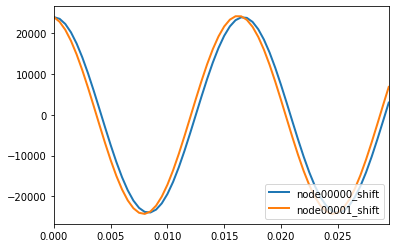

In [34]:
pt.plot_timeseries(1, ts_dpsim_ststate_emt['node00000_shift'])
pt.plot_timeseries(1, ts_dpsim_ststate_emt['node00001_shift'])

In [35]:
# read log file
work_dir = '../../../logs/DP_SynGen_TrStab_SteadyState/'
logName_ststate = 'DP_SynGen_TrStab_SteadyState'
print(work_dir + logName_ststate + '.csv')
ts_dpsim_ststate = rt.read_timeseries_dpsim(work_dir + logName_ststate + '.csv')
ts_dpsim_ststate_emt = ts.frequency_shift_list(ts_dpsim_ststate, 60)
phasors_ststate = ts.phasors(ts_dpsim_ststate)

../../../logs/DP_SynGen_TrStab_SteadyState/DP_SynGen_TrStab_SteadyState.csv
column number: 4
results length: 60
real column names: ['wr_gen']
complex column names: ['i_gen', 'i_load', 'v1']


In [36]:
print('v1' + ': ' + str(phasors_ststate['v1']['abs'].values[0]) + '<' + str(phasors_ststate['v1']['phase'].values[0]))

v1: 24000.0<-0.0


(375, 380)

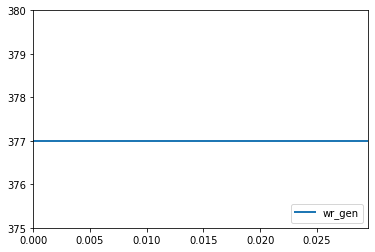

In [37]:
pt.plot_timeseries(1, ts_dpsim_ststate['wr_gen'])
plt.ylim([375,380])

In [38]:
import numpy as np
assert np.max(ts_dpsim_ststate['wr_gen'].values[0] - ts_dpsim_ststate['wr_gen'].values[-1]) < 0.001

## Load Step

In [39]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

DP_SynGenTrStab_LoadStep

Scheduling tasks.
Start simulation.
0.05: Handle event
Simulation finished.


In [40]:
# read log file
work_dir = 'logs/DP_SynGen_TrStab_LoadStep/'
logName = 'DP_SynGen_TrStab_LoadStep'
print(work_dir + logName + '.csv')
ts_dpsim_loadstep= rt.read_timeseries_dpsim(work_dir + logName + '.csv')
ts_dpsim_loadstep_emt = ts.frequency_shift_list(ts_dpsim_loadstep, 60)
phasors_loadstep = ts.phasors(ts_dpsim_loadstep)

../../../logs/DP_SynGen_TrStab_LoadStep/DP_SynGen_TrStab_LoadStep.csv
column number: 4
results length: 200
real column names: ['wr_gen']
complex column names: ['i_gen', 'i_load', 'v1']


In [41]:
print('v1' + ': ' + str(phasors_loadstep['v1']['abs'].values[0]) + '<' + str(phasors_loadstep['v1']['phase'].values[0]))

v1: 24000.0<-0.0


(0.03, 0.07)

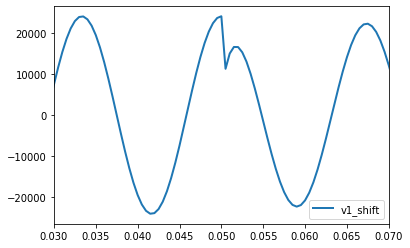

In [42]:
pt.plot_timeseries(2, ts_dpsim_loadstep_emt['v1_shift'])
plt.xlim(0.03, 0.07)  

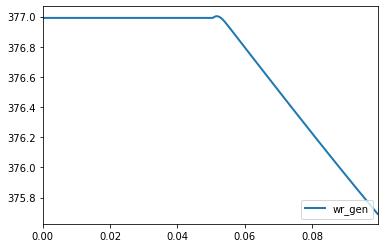

In [43]:
pt.plot_timeseries(3, ts_dpsim_loadstep['wr_gen'])

In [44]:
assert np.max(ts_dpsim_loadstep['wr_gen'].values[0] - ts_dpsim_loadstep['wr_gen'].values[-1]) < 5